In [1]:
import pandas as pd
import graphviz
from python_scripts import csv_processing as dp
from python_scripts import evaluation

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer

##### Import Data

In [19]:
df = pd.read_csv("../data/3year.csv")
X_train, X_test, y_train, y_test = dp.pre_process(df)

##### XGBoost

In [20]:
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier()

In [21]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

##### Training

In [25]:
param = {'objective': 'binary:logistic'}
param['nthread'] = 4
param['eval_metric'] = 'auc'
evallist = [(dtrain, 'train'), (dtest, 'eval')]
num_round = 10
bst = xgb.train(param, dtrain, num_round, evallist)
y_pred = bst.predict(dtest)
y_pred_copy = y_pred.copy()
y_pred[y_pred_copy>0.5] = 1
y_pred[y_pred_copy<=0.5] = 0
evaluation.print_res(y_test, y_pred)

Confusion Matrix:


 [[2620  397]
 [  53   81]]
Accuracy: 0.857
Precision Score: 0.169
Recall Score: 0.604
F1 Score: 0.265
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.87      0.92      3017
           1       0.17      0.60      0.26       134

    accuracy                           0.86      3151
   macro avg       0.57      0.74      0.59      3151
weighted avg       0.95      0.86      0.89      3151



<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

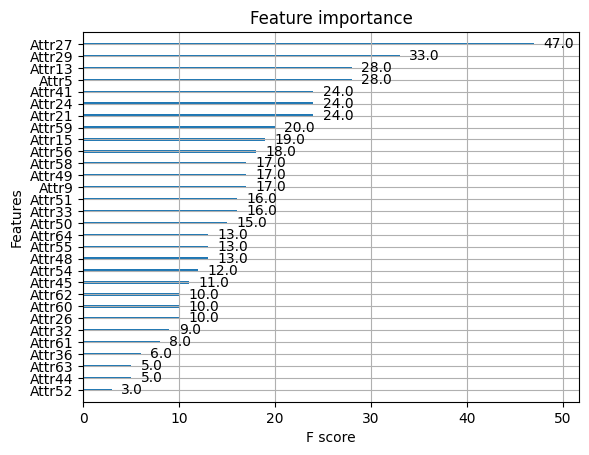

In [26]:
xgb.plot_importance(bst)

In [29]:
# Train a model using the scikit-learn API
xgb_classifier = xgb.XGBClassifier(n_estimators=100, objective='binary:logistic', tree_method='hist', eta=0.1, max_depth=3, enable_categorical=True)
xgb_classifier.fit(X_train, y_train)

y_pred = xgb_classifier.predict(X_test)
evaluation.print_res(y_test, y_pred)

Confusion Matrix:
 [[2571  446]
 [  52   82]]
Accuracy: 0.842
Precision Score: 0.155
Recall Score: 0.612
F1 Score: 0.248
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.85      0.91      3017
           1       0.16      0.61      0.25       134

    accuracy                           0.84      3151
   macro avg       0.57      0.73      0.58      3151
weighted avg       0.95      0.84      0.88      3151

